In [1]:
import numpy as np
import scipy.special as special
import matplotlib.pyplot as plt
import pandas as pd

In [231]:
num_samples = 50
num_directions = 360
actions = np.arange(num_directions)
correct_direction = 45

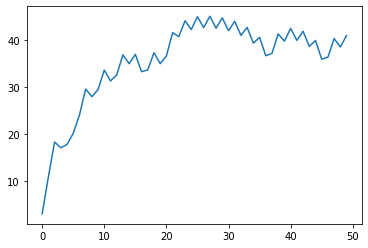

In [247]:
action = np.random.choice(actions)
alpha = 0.1
beta = 1
action_list = []
error_list = []
for sample in range(num_samples):
    action_list.append(action)
    error = correct_direction - action
    correct_direction = (correct_direction + action)%90
    action = action + alpha * error
    error_list.append(error)
plt.plot(action_list)
#plt.plot(error_list)

In [248]:
r = 0.2
x = []
y = []
for action in action_list:
    x.append(r*np.cos(action))
    y.append(r*np.sin(action))


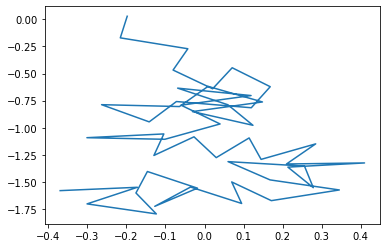

In [252]:
plt.plot(np.cumsum(x), np.cumsum(y))

In [2]:
num_states = 4
num_actions = 360
env = np.zeros((num_states, num_actions)) - 0.1
env[0, 45] = 1
env[1, 135] = 1
env[2, 225] = 1
env[3, 315] = 1

In [3]:
trials = np.hstack((np.random.permutation(np.repeat(np.arange(4), 4)), 
                   np.random.permutation(np.repeat(np.arange(4), 4)), 
                   np.random.permutation(np.repeat(np.arange(4), 4)), 
                   np.random.permutation(np.repeat(np.arange(4), 4))))

In [4]:
class Q_learner:
    def __init__(self):
        self.q = np.reshape(np.random.uniform(0, 1, (num_states, num_actions)), (num_states, num_actions))
    
    def get_q_values(self, state):
        return self.q[state]
    
    def q_update(self, state, action, reward, alpha):
        for a in range(len(self.q[state])):
            if a == action:
                self.q[state][action] = self.q[state][action] + alpha * (reward - self.q[state][action])
            else:
                self.q[state][a] = self.q[state][a] - alpha * (reward - self.q[state][a])/(len(self.q[state]) - 1)
                
        return self.q

In [5]:
q_learn = Q_learner()

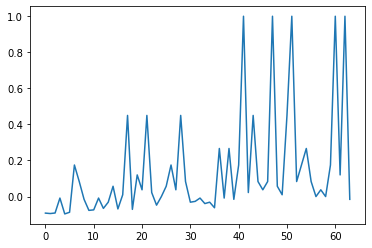

In [6]:
trial_reward = list()
gain = 5
actions = []
for trial in trials:
    reward = 0
    reward_list = list()

    while reward <= 0:
        q_val = q_learn.get_q_values(trial)
        action_prob = special.softmax(gain*q_val)
        action_selected = np.random.choice(np.arange(num_actions), p = action_prob)
        #action_selected = np.random.choice([np.random.choice(range(num_actions)), np.argmax(action_prob)], p = [0.1, 0.9])
        actions.append(action_selected)
        reward = env[trial][action_selected]
        q_learn.q_update(trial, action_selected, reward, 0.9)
        reward_list.append(reward)
    trial_reward.append(np.mean(reward_list))
plt.plot(trial_reward)

In [189]:
env[0, 45] = -0.1
env[1, 135] = -0.1
env[2, 225] = -0.1
env[3, 315] = -0.1

env[1, 45] = 1
env[2, 135] = 1
env[3, 225] = 1
env[0, 315] = 1

In [192]:
trial_reward = list()
gain = 1
actions = []
for trial in trials:
    reward = 0
    reward_list = list()

    while reward <= 0:
        q_val = q_learn.get_q_values(trial)
        action_prob = special.softmax(gain*q_val)
        action_selected = np.random.choice(np.arange(num_actions), p = action_prob)
        #action_selected = np.random.choice([np.random.choice(range(num_actions)), np.argmax(action_prob)], p = [0.1, 0.9])
        actions.append(action_selected)
        reward = env[trial][action_selected]
        q_learn.q_update(trial, action_selected, reward, 0.9)
        reward_list.append(reward)
    trial_reward.append(np.mean(reward_list))
    print(trial)
plt.plot(trial_reward)

<ipython-input-182-165cabe5464b>:13: RuntimeWarning: overflow encountered in double_scalars
  self.q[state][a] = self.q[state][a] - alpha * (reward - self.q[state][a])/(len(self.q[state]) - 1)


KeyboardInterrupt: 

In [147]:
trial = 0
q_val = q_learn.get_q_values(trial)
action_prob = special.softmax(gain*q_val)
action_selected = np.random.choice(np.arange(num_actions), p = action_prob)
action_selected, np.argmax(action_prob)

(348, 315)

In [40]:
def rl_sudden(num_trials, alpha_q, phi, weight):
    W_0 = 1/90
    q = np.zeros((num_trials, 90)) + (1/90)
    w = np.zeros((num_trials, 90)) + (1/90)
    policy_vector = np.arange(90)
    alpha_w = 1
    reward_list = list()
    reward = 0
    for trial in range(num_trials - 1):
    #reward = 0

    #while reward <= 0:
        q_policy = np.random.choice(policy_vector, p = special.softmax(q[trial]))
        w_policy = np.random.choice(policy_vector, p = special.softmax(w[trial]))

        angle = weight * q_policy + (1 - weight) * w_policy

        if int(angle) == 90:
            reward = 1
        else:
            reward = -0.1
        reward_list.append(reward)


        q[trial + 1][int(angle)] = q[trial][int(angle)] + alpha_q * (reward - q[trial][int(angle)])


        w[trial] = w[trial][int(angle)] + phi * (W_0 - w[trial][int(angle)])
        w[trial + 1] = w[trial][int(angle)] + alpha_w * (w[trial][int(angle)])

    return reward_list

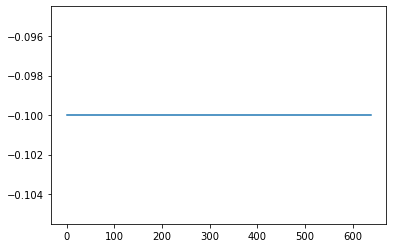

In [102]:
plt.plot(rl_sudden(640, 0.9, 0.99, 0.5))

In [26]:
env = np.zeros(360) 
env[90] = 1
env_copy = np.zeros(360)


In [34]:
#Change environment
env[90] = 0
env[45] = 1

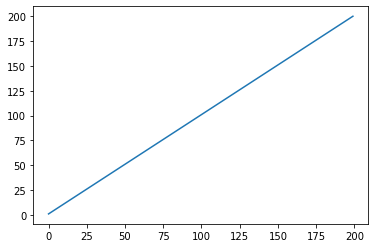

In [40]:
start = np.random.randint(0, 360, 1)
pos = start
alpha = 0.01
actions = np.arange(360)
reward = 0
reward_list = list()
gain = 500
for i in range(200):
    #action selection
    act_probabilities  = special.softmax(gain*env_copy)
    action = np.random.choice(actions, p = act_probabilities)
    #Q update
    env_copy[action] = env_copy[action] + alpha*(env[action] - env_copy[action])
    
    reward = reward + env[action]
    reward_list.append(reward)
plt.plot(reward_list)

In [253]:
grid = np.zeros((20, 20)) - 10
grid[17:19, 17:19] = 10

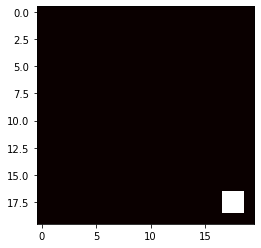

In [254]:
plt.imshow(grid, cmap = 'hot')

In [255]:
start_pos = np.array([10, 10])
Actions = np.array(['L', 'R', 'U', 'D', 'LU', 'LD', 'RU', 'RD'])
action_map = {'L': [-1, 0], 'R': [1, 0], 'U': [0, -1], 'D': [0, 1], 
              'LU': [-1, -1], 'LD': [-1, 1], 'RU': [1, -1], 'RD': [1, 1]}
alpha = 0.9

In [264]:
q_df = pd.DataFrame({'X': np.repeat(np.arange(20), 20), 
                  'Y': np.tile(np.arange(20), 20),
                  'L': np.zeros(400),
                  'R': np.zeros(400),
                  'U': np.zeros(400),
                  'D': np.zeros(400),
                  'LU': np.zeros(400),
                  'LD': np.zeros(400),
                  'RU': np.zeros(400),
                  'RD': np.zeros(400),                 
                 })
q_melt = pd.melt(q_df, id_vars=['X', 'Y'],var_name='Action', value_name = 'Q_val')
q = np.zeros((20, 20, 8))

In [265]:
curr_state = start_pos
episode_reward = list()
episode_length = list()
curr_reward = -10
num_episodes = 100
decay = 0.9
for i in range(num_episodes):
    curr_reward = -0.1
    curr_state = start_pos
    reward = list()
    states = list()

    while curr_reward < 10:    
        #Softmax action selection
        direction = np.random.choice(Actions, p = special.softmax(q[curr_state[0], curr_state[1]]))
        action = np.array(action_map[direction])

        new_state = curr_state + action
        if new_state[0] < 0 or new_state[0] > 19 or new_state[1] < 0 or new_state[1] > 19:
            new_state = curr_state
    
        curr_reward = grid[new_state[0], new_state[1]]
        for j in range(8):
            if j == direction:
                q[curr_state[0], curr_state[1]] = q[new_state[0], new_state[1]] + alpha * (curr_reward - q[new_state[0], new_state[1]])
            else:
                q[curr_state[0], curr_state[1]] = q[new_state[0], new_state[1]]  - alpha * (curr_reward - q[new_state[0], new_state[1]])
        
        reward.append(curr_reward)
        curr_state = new_state
        states.append(curr_state)

    episode_reward.append(sum(reward))
    episode_length.append(len(reward))
        
#plt.plot(episode_length)

ValueError: probabilities do not sum to 1

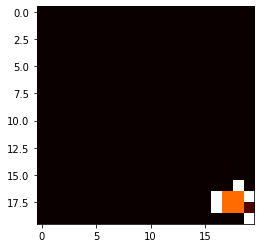

In [258]:
plt.imshow(np.mean(q, axis = 2), cmap = 'hot')